# Relatório: Análise de Dados do INEP

## Introdução

Nesse trabalho, desenvolvido para o curso de Álgebra Linear, encontraremos um modelo linear para as notas do IDEB de cada unidade federativa brasileira. Em seguida, será analisado se o modelo é devidamente ajustado aos dados, utilizando $R^{2}$. Assim, poderá ser analisado quais estados tiveram maiores taxas de crescimento na educação. Ao fazer a regressão linear para encontrar tal modelo, utilizaremos o Método dos Mínimos Quadrados (MMQ), que explicaremos adiante, desenvolvido pelo famoso matemático Carl Friedrich Gauss, em 1795.

### Sobre os métodos que serão utilizados:

Ao fazermos a regressão linear, encontraremos um modelo da forma $b_i =Dt_i+C$, onde $b_i$ será a nota em função de $t_i$, o ano. Tendo os pontos $(t_i,b_i)$, a solução utilizando mínimos quadrados, técnica de otimização para obter o melhor ajuste de dados ao minimizar a soma dos erros quadrados(SEQ), sendo erro=e, é dada por:
$$e=\displaystyle\sum_{i=1}^{n} (y(t_i)-b_i)^{2}=\displaystyle\sum_{i=1}^{n} (C+ Dt_i-b_i)^{2}$$

Sendo: $A=\begin{bmatrix}
1 & t_1\\
\vdots & \vdots \\
1 & t_n
\end{bmatrix}$ $b=\begin{bmatrix}
b_1\\
\vdots\\
b_n
\end{bmatrix}$ $\hat x=\begin{bmatrix}
C\\
D
\end{bmatrix}$

$e=\|Ax-b||^{2}\Rightarrow$
 $\hat x = (A^{T}A)^{-1}A^{T}b\Rightarrow A^{T}A\hat x =A^{T}b$

$A^{T}A = \begin{bmatrix}
    m & \displaystyle\sum_{i=1}^{n} t_i\\
    \displaystyle\sum_{i=1}^{n} t_i & \displaystyle\sum_{i=1}^{n} t_i^{2}
    \end{bmatrix}$

$A^{T}b=\begin{bmatrix}
    \displaystyle\sum_{i=1}^{n} b_i\\
    \displaystyle\sum_{i=1}^{n} t_ib_i
    \end{bmatrix} $


O $R^{2}$ (coeficiente de determinação) mede quão bem um modelo é ajustado à um modelo linear. Esse coeficiente varia entre 0 e 1, sendo 1 um modelo linear perfeitamente ajustado aos dados. Sendo $SEQ$ a soma dos erros quadrados e $SEQ_m$ a média, $R^{2}=\dfrac{SEQ_m - SEQ}{SEQ_m}$.

### Sobre o IDEB e a base de dados:

O Índice de Desenvolvimento da Educação Básica (IDEB) é um indicador social da qualidade da educação brasileira criado em 2005 pelo Ministério da Educação, por meio do Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (Inep). O cálculo do IDEB é baseado em dois fatores: 

(i) o fluxo escolar, isto é, as aprovações e o rendimento escolar dos alunos de cada instituição, obtidos pelo Censo Escolar; 

(ii) o desempenho dos alunos no Saeb, o Sistema de Avaliação da Educação Básica, que consiste em um conjunto de provas aplicadas no 2º, 5º e 9º ano do Ensino Fundamental, bem como no 3º ano do Ensino Médio.

O valor final do IDEB varia de zero a dez, e, a cada aplicação, são estipuladas metas de melhoria na nota, o que reflete diretamente o progresso da qualidade das escolas, em nível local, municipal, estadual e federal. A principal função do IDEB é nortear as políticas públicas que serão aplicadas nas escolas brasileiras, com base em suas deficiências no ensino e seus contextos sociais, analisados a partir dos questionários socioeconômicos aplicados no Saeb, como também encontrar exemplos de instituições bem sucedidas, de forma a estudá-las e expandir seus métodos em larga escala.

Para este trabalho, a base de dados escolhida retrata o valor do IDEB do 5º ano do Ensino Fundamental para cada um dos estados brasileiros, de 2005 a 2019.



## Análise dos dados

### Importando bibliotecas

Utilizando o código disponibilizado no EClass como referência, primeiramente foram importadas as bibliotecas e os pacotes necessários para dar início à análise.

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

Realizando a estilização dos gráficos plotados pelo matplotlib:

In [204]:
# Definindo a estilização dos gráficos
params = {'legend.fontsize': 20,
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 20,
         'axes.titlesize':20,
         'xtick.labelsize':20,
         'ytick.labelsize':20}

plt.style.use('ggplot')
    
plt.rcParams.update(params)

### Coletando os dados

Em sequência, foi feita a leitura da base de dados dos valores do IDEB.

In [5]:
# Lendo a base de dados
data = pd.read_excel('ideb.xlsx').dropna()
print(data)


    Ano   AC   AL   AP   AM   BA   CE   DF   ES   GO  ...   PI   RJ   RN   RS  \
0  2005  3.4  3.2  3.2  3.1  2.7  3.2  4.8  4.2  4.1  ...  2.8  4.3  2.7  4.3   
1  2007  3.8  3.3  3.4  3.6  3.4  3.8  5.0  4.6  4.3  ...  3.5  4.4  3.4  4.6   
2  2009  4.3  3.7  3.8  3.9  3.8  4.4  5.6  5.1  4.9  ...  4.0  4.7  3.9  4.9   
3  2011  4.6  3.8  4.1  4.3  4.2  4.9  5.7  5.2  5.3  ...  4.4  5.1  4.1  5.1   
4  2013  5.1  4.1  4.0  4.7  4.3  5.2  5.9  5.4  5.7  ...  4.5  5.2  4.4  5.6   
5  2015  5.4  4.7  4.5  5.2  4.7  5.9  6.0  5.7  5.8  ...  4.9  5.5  4.8  5.7   
6  2017  5.8  5.2  4.6  5.4  5.1  6.2  6.3  6.0  6.1  ...  5.3  5.8  5.0  5.8   
7  2019  5.9  5.6  4.9  5.5  5.3  6.4  6.5  6.1  6.2  ...  5.7  5.8  5.2  6.0   

    RO   RR   SC   SP   SE   TO  
0  3.6  3.7  4.4  4.7  3.0  3.5  
1  4.0  4.1  4.9  5.0  3.4  4.1  
2  4.3  4.3  5.2  5.5  3.8  4.5  
3  4.7  4.7  5.8  5.6  4.1  4.9  
4  5.2  5.0  6.0  6.1  4.4  5.1  
5  5.4  5.2  6.3  6.4  4.6  5.1  
6  5.8  5.5  6.5  6.6  4.9  5.6 

Abaixo, segue um resumo dos dados da base escolhida

In [33]:
# Descrevendo informações sobre a base
data.describe()

,Ano,AC,AL,AP,AM,BA,CE,DF,ES,GO,...,PI,RJ,RN,RS,RO,RR,SC,SP,SE,TO
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,2012.000000,4.787500,4.200000,4.062500,4.462500,4.187500,5.000000,5.725000,5.287500,5.300000,...,4.387500,5.100000,4.187500,5.250000,4.825000,4.775000,5.700000,5.825000,4.162500,4.800000
std,4.898979,0.918753,0.881557,0.590248,0.886305,0.872496,1.152637,0.589794,0.659951,0.798212,...,0.947836,0.590399,0.847581,0.616441,0.801338,0.702546,0.785584,0.744024,0.730826,0.730949
min,2005.000000,3.400000,3.200000,3.200000,3.100000,2.700000,3.200000,4.800000,4.200000,4.100000,...,2.800000,4.300000,2.700000,4.300000,3.600000,3.700000,4.400000,4.700000,3.000000,3.500000
25%,2008.500000,4.175000,3.600000,3.700000,3.825000,3.700000,4.250000,5.450000,4.975000,4.750000,...,3.875000,4.625000,3.775000,4.825000,4.225000,4.250000,5.125000,5.375000,3.700000,4.400000
50%,2012.000000,4.850000,3.950000,4.050000,4.500000,4.250000,5.050000,5.800000,5.300000,5.500000,...,4.450000,5.150000,4.250000,5.350000,4.950000,4.850000,5.900000,5.850000,4.250000,5.000000
75%,2015.500000,5.500000,4.825000,4.525000,5.250000,4.800000,5.975000,6.075000,5.775000,5.875000,...,5.000000,5.575000,4.850000,5.725000,5.450000,5.275000,6.350000,6.450000,4.675000,5.225000
max,2019.000000,5.900000,5.600000,4.900000,5.500000,5.300000,6.400000,6.500000,6.100000,6.200000,...,5.700000,5.800000,5.200000,6.000000,5.800000,5.700000,6.500000,6.700000,5.100000,5.600000


## Regressão linear e minímos quadrados

Nessa etapa, será realizada a regressão linear e o cálculo dos mínimos quadrados para cada estado. Devido à grande quantidade de estados, a explicação do código e dos procedimentos será feita somente uma vez (correspondente ao estado do Acre), visando tornar o trabalho mais compacto e evitar muitas repetições.


### Acre

Primeiramente foram setadas duas variáveis, uma correspondente aos valores do IDEB do estado em questão e a outra com os anos relacionados a esses valores. Plotou-se então o gráfico de dispersão da nota pelo ano. 

Text(0.5, 1.0, 'ACRE')

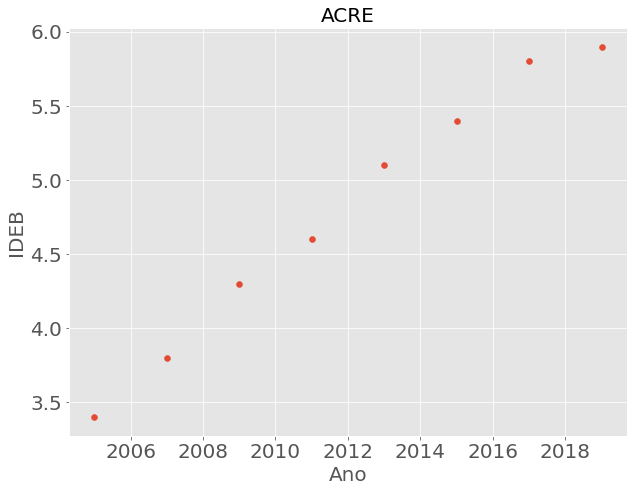

In [200]:
# Setando as váriaveis
AC = data['AC'].values
Ano = data['Ano'].values

# Plotando o gráfico
plt.figure()
plt.scatter(Ano, AC)
plt.xlabel('Ano')
plt.ylabel('IDEB')
plt.title('ACRE')

Abaixo, foi feita uma modelagem nos dados, aplicando o logaritmo natural em cada uma das variáveis, de modo a controlar a discrepância na escala dos dados. Após a modelagem, o gráfico foi plotado mais uma vez.

Text(0.5, 1.0, 'ACRE')

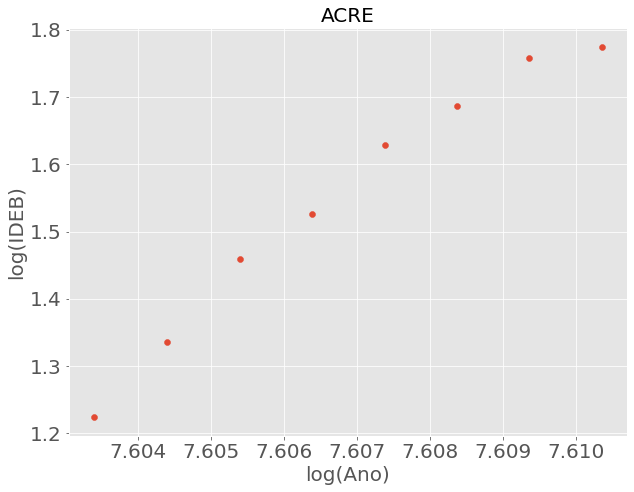

In [201]:
# Plotando o gráfico com a nova modelagem
plt.figure()
plt.scatter(np.log(Ano), np.log(AC))
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('ACRE')

Foi calculada, então, a solução dos mínimos quadrados para $b=Dt+C$, em que $b$ será a nota em função de $t$, o ano. Para isso, setamos as variáveis $t$ como o log do ano, $b$ como o log do IDEB e uma variável $ones$, que é um vetor composto somente pelo número $1$ e do mesmo tamanho de $t$. Utilizando $t$ e $ones$, foi composta a matriz $A$. Por fim, efetua-se a multiplicação $A^TA$ e $A^Tb$ e resolve-se o sistema $(A^TA)\hat x=A^Tb$.

In [190]:
# Setando as variáveis
t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AC)

# Criando a matriz A
A = np.array([ones, t]).T

# Realizando a multiplicação matricial
AtA = A.T @ A
Atb = A.T @ b

# Encontrando a solução do sistema
x_hat = np.linalg.solve(AtA, Atb)

Portanto, obtemos que $b = 80.96086954t -614.31078896$.

In [194]:
# Exibindo o resultado do sistema
print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-614.31078896   80.96086954]
O coeficiente angular é 80.96086954207776


Para o novo plot, criou-se um linspace da variável $t$, isto é, um conjunto de números igualmente espaçados no intervalo entre o menor e o maior valor de $t$. O linspace auxilia na visualização dos dados e na construção do eixo desejado.

In [195]:
# Criando o linspace
t_linspace = np.linspace(np.min(t), np.max(t), 101)

# Criando a reta
least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

Abaixo, foi calculado o coeficiente de determinação, $R^2$, o qual diz muito sobre a confiabilidade do modelo: quanto mais próximo de 1, melhor é a previsão do modelo.

In [196]:
# Calculando o R²
SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

# Printando o valor
print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.008231837055654216
R²: 0.9946856648881632


A seguir, foi feita a regressão através da biblioteca scikit-learn.

In [197]:
# Determinando o modelo da regressão e ajustando-o
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

# Fazendo o predict da regressão
least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

Plota-se, portanto, o gráfico de dispersão contendo a regressão calculada a partir da fórmula e a partir do scikit-learn.

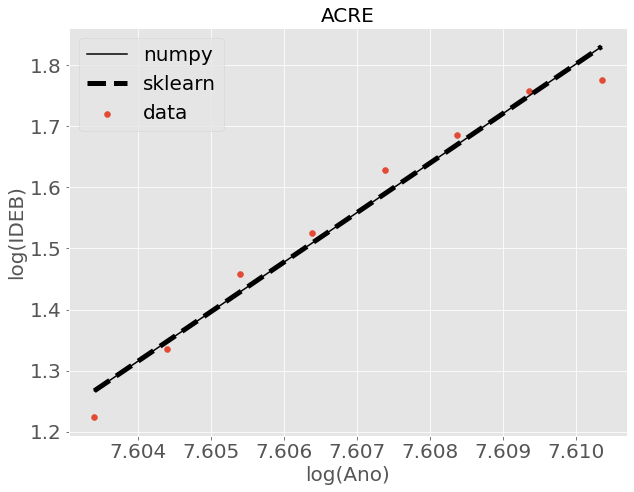

In [202]:
# Plotando o gráfico
fig, ax = plt.subplots()
plt.scatter(t, b, label='data')
plt.plot(t_linspace, least_square_plot, color='k', label='numpy')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5, label='sklearn')
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('ACRE')
plt.legend()

Por fim, utiliza-se a fórmula encontrada para estimar uma previsão do IDEB do estado em 2021.

In [203]:
# Calculando a previsão
previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))

IDEB estimado:  6.756740697318955


### ALAGOAS

In [397]:
AL = data['AL'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AL)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])




[-634.82686484   83.64046765]
O coeficiente angular é 83.64046764589816


In [398]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.00664482930744163
R²: 0.9953083104287654


No handles with labels found to put in legend.


IDEB estimado:  5.9883604461274444
R²: 0.9953083104287654
Modelo: b = 83.64046764589816 . t -634.8268648396886


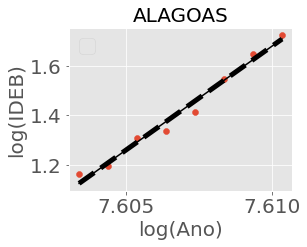

In [403]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--',linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('ALAGOAS')
plt.legend()

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])


### AMAPÁ

In [404]:
AP = data['AP'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AP)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])


[-452.01931289   59.60545185]
O coeficiente angular é 59.6054518542234


In [405]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.0063022949635165686
R²: 0.9954735369494758


No handles with labels found to put in legend.


IDEB estimado:  5.251464693668699
R²: 0.9954735369494758
Modelo: b = 59.6054518542234 . t -452.01931288849124


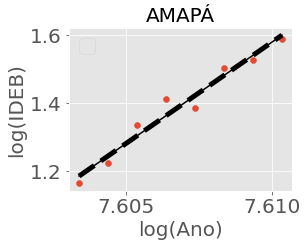

In [406]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('AMAPÁ')
plt.legend()

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### AMAZONAS

In [407]:
AM = data['AM'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(AM)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)
x_hat

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-635.68120253   83.76081287]
O coeficiente angular é 83.76081287181721


In [408]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.010676462216950249
R²: 0.9927735374585493


IDEB estimado:  6.369171033584488
R²: 0.9927735374585493
Modelo: b = 83.76081287181721 . t -635.6812025346771


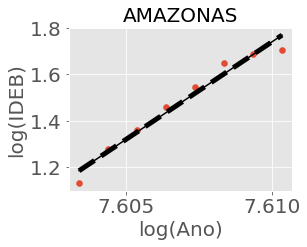

In [410]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('AMAZONAS')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### BAHIA

In [411]:
BA = data['BA'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(BA)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])



[-673.77117425   88.75942331]
O coeficiente angular é 88.7594233108828


In [412]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.023412713723739865
R²: 0.9834102952515283


IDEB estimado:  6.096164277590525
R²: 0.9834102952515283
Modelo: b = 88.7594233108828 . t -673.7711742489047


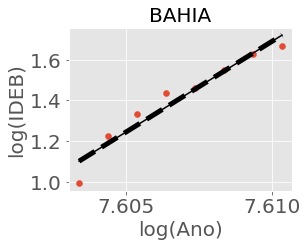

In [413]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')

plt.title('BAHIA')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### CEARÁ

In [414]:
CE = data['CE'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(CE)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])


[-749.17013448   98.69409331]
O coeficiente angular é 98.6940933083374


In [415]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

EQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.023412713723739865
R²: 0.9852209373500257


IDEB estimado:  7.575560491539805
R²: 0.9852209373500257
Modelo: b = 98.6940933083374 . t -749.1701344826932


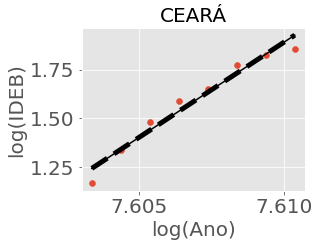

In [416]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('CEARÁ')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### Distrito Federal


In [417]:
DF = data['DF'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(DF)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])


[-318.92779416   42.15496449]
O coeficiente angular é 42.15496448896311


In [418]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.0043502928732411725
R²: 0.9974998945858056


IDEB estimado:  6.877798226587905
R²: 0.9974998945858056
Modelo: b = 42.15496448896311 . t -318.9277941647791


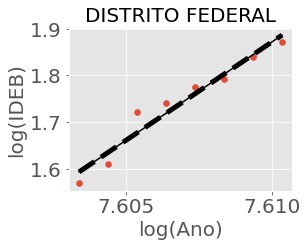

In [419]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('DISTRITO FEDERAL')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### Espírito Santo

In [420]:
ES = data['ES'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(ES)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-391.27187541   51.65455739]
O coeficiente angular é 51.654557388477684


In [421]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.005367679379744492
R²: 0.9967630343735427


IDEB estimado:  6.612237233012372
R²: 0.9967630343735427
Modelo: b = 51.654557388477684 . t -391.2718754138079


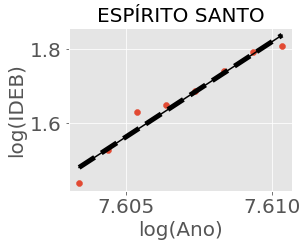

In [422]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')

plt.title('ESPÍRITO SANTO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### GOIÁS

In [423]:
GO = data['GO'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(GO)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-474.17218678   62.55248918]
O coeficiente angular é 62.55248917553731


In [424]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.010300443790495245
R²: 0.9937844790630131


IDEB estimado:  6.934846544878836
R²: 0.9937844790630131
Modelo: b = 62.55248917553731 . t -474.1721867782497


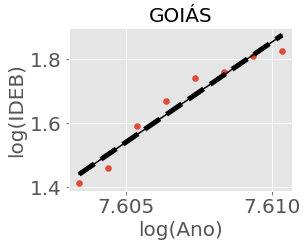

In [425]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('GOIÁS')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### MARANHÃO

In [426]:
MA = data['MA'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(MA)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-509.75294688   67.19710706]
O coeficiente angular é 67.19710705544226


In [427]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.02292540309706028
R²: 0.9837121200954437


IDEB estimado:  5.515710743889038
R²: 0.9837121200954437
Modelo: b = 67.19710705544226 . t -509.75294688348015


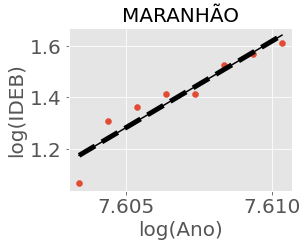

In [428]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')

plt.title('MARANHÃO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### MATO GROSSO

In [429]:
MT = data['MT'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(MT)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-492.04523928   64.89684339]
O coeficiente angular é 64.89684338771394


In [430]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.025120123097199232
R²: 0.9844686947552496


IDEB estimado:  6.734216714350742
R²: 0.9844686947552496
Modelo: b = 64.89684338771394 . t -492.04523928344247


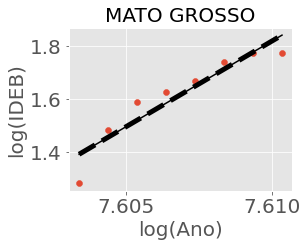

In [431]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('MATO GROSSO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### MATO GROSSO DO SUL

In [432]:
MS = data['MS'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(MS)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-470.60395239   62.07472449]
O coeficiente angular é 62.07472448978087


In [433]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.020376246719834526
R²: 0.9871939973698112


IDEB estimado:  6.47766534429917
R²: 0.9871939973698112
Modelo: b = 62.07472448978087 . t -470.60395239468045


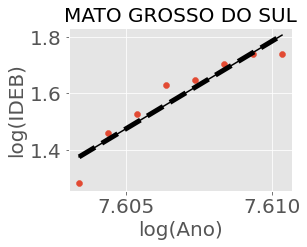

In [434]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('MATO GROSSO DO SUL')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### MINAS GERAIS

In [435]:
MG = data['MG'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(MG)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-388.05568312   51.24357748]
O coeficiente angular é 51.24357748251072


In [436]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.015590340746816686
R²: 0.9910818613567389


IDEB estimado:  7.221071743627761
R²: 0.9910818613567389
Modelo: b = 51.24357748251072 . t -388.05568312026946


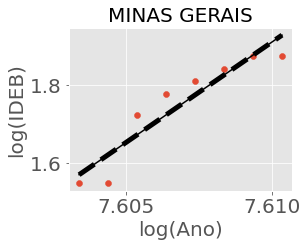

In [437]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')

plt.title('MINAS GERAIS')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### PARÁ

In [438]:
PA = data['PA'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(PA)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-601.74408354   79.28440518]
O coeficiente angular é 79.28440518305621


In [439]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.02152767644399744
R²: 0.9842059698516434


IDEB estimado:  5.568317148526994
R²: 0.9842059698516434
Modelo: b = 79.28440518305621 . t -601.7440835352023


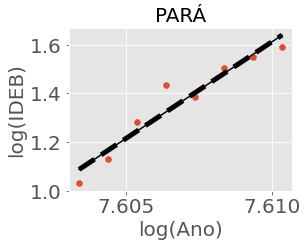

In [440]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('PARÁ')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### PARAÍBA

In [441]:
PB = data['PB'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(PB)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-624.72851959   82.31656429]
O coeficiente angular é 82.31656428507661


In [442]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.01146167401881298
R²: 0.9920618183032918


IDEB estimado:  6.119461414484501
R²: 0.9920618183032918
Modelo: b = 82.31656428507661 . t -624.7285195872439


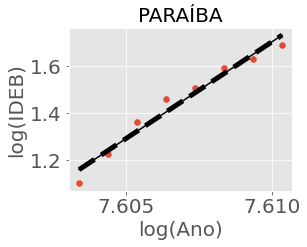

In [443]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('PARAÍBA')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### PARANÁ

In [444]:
PR = data['PR'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(PR)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-380.83670785   50.29296915]
O coeficiente angular é 50.29296914585229


In [445]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.004001030722145207
R²: 0.9976952199280233


IDEB estimado:  7.103361019755176
R²: 0.9976952199280233
Modelo: b = 50.29296914585229 . t -380.8367078546326


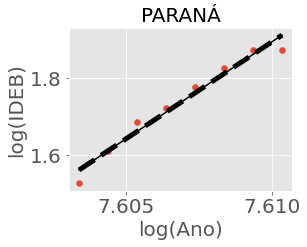

In [446]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('PARANÁ')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### PERNAMBUCO

In [447]:
PE = data['PE'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(PE)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-573.84239999   75.63156842]
O coeficiente angular é 75.63156841981582


In [448]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.008095426657645175
R²: 0.9945227588339706


IDEB estimado:  6.145780001776215
R²: 0.9945227588339706
Modelo: b = 75.63156841981582 . t -573.8423999881038


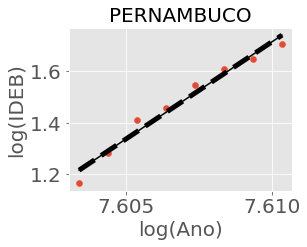

In [449]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('PERNAMBUCO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### PIAUÍ

In [450]:
PI = data['PI'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(PI)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-698.51682858   92.01842558]
O coeficiente angular é 92.0184255775471


In [451]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.023018791292171374
R²: 0.9841955016647085


IDEB estimado:  6.471480470297741
R²: 0.9841955016647085
Modelo: b = 92.0184255775471 . t -698.5168285756438


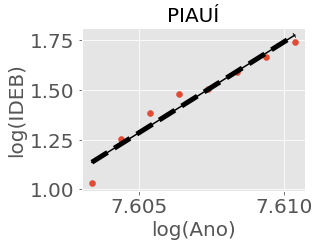

In [452]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('PIAUÍ')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### RIO DE JANEIRO

In [453]:
RJ = data['RJ'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(RJ)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-359.804935     47.51331835]
O coeficiente angular é 47.51331835064216


In [454]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.002770030014717909
R²: 0.9982935474818602


IDEB estimado:  6.267967700244845
R²: 0.9982935474818602
Modelo: b = 47.51331835064216 . t -359.80493500307114


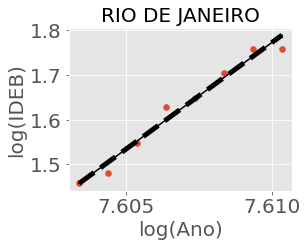

In [455]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('RIO DE JANEIRO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### RIO GRANDE DO NORTE

In [456]:
RN = data['RN'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(RN)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-655.57349847   86.3672747 ]
O coeficiente angular é 86.367274704969


In [457]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.028178015404995017
R²: 0.9800462084719069


IDEB estimado:  6.036719360166841
R²: 0.9800462084719069
Modelo: b = 86.367274704969 . t -655.5734984719415


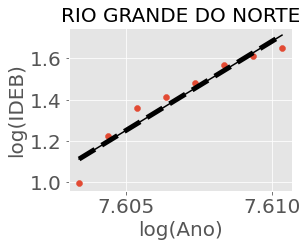

In [458]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('RIO GRANDE DO NORTE')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### RIO GRANDE DO SUL

In [459]:
RS = data['RS'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(RS)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-366.30045351   48.37099566]
O coeficiente angular é 48.3709956572378


In [460]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.004188143725739294
R²: 0.9974648035088236


IDEB estimado:  6.475422637644858
R²: 0.9974648035088236
Modelo: b = 48.3709956572378 . t -366.3004535065788


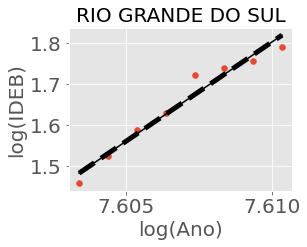

In [461]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('RIO GRANDE DO SUL')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### RONDÔNIA

In [462]:
RO = data['RO'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(RO)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-521.02510358   68.699139  ]
O coeficiente angular é 68.69913899830487


In [463]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.012086644430938008
R²: 0.9922577888197501


IDEB estimado:  6.4748874062504616
R²: 0.9922577888197501
Modelo: b = 68.69913899830487 . t -521.0251035839036


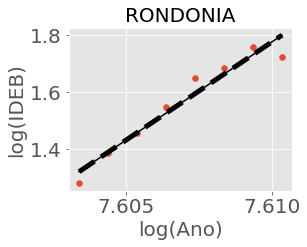

In [464]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('RONDONIA')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### RORAIMA

In [465]:
RR = data['RR'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(RR)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-465.46625063   61.39438675]
O coeficiente angular é 61.39438675225113


In [466]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.0030440623940416697
R²: 0.9980406408323421


IDEB estimado:  6.220030680521711
R²: 0.9980406408323421
Modelo: b = 61.39438675225113 . t -465.46625062884306


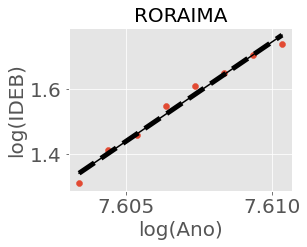

In [467]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('RORAIMA')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### SANTA CATARINA

In [468]:
SC = data['SC'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(SC)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-431.46007711   56.94734576]
O coeficiente angular é 56.947345757141456


In [469]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.010549589180683109
R²: 0.9939078127405833


IDEB estimado:  7.286133597653863
R²: 0.9939078127405833
Modelo: b = 56.947345757141456 . t -431.46007710618136


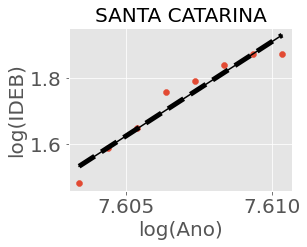

In [470]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('SANTA CATARINA')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### SÃO PAULO

In [471]:
SP = data['SP'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(SP)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-400.07718119   52.82479331]
O coeficiente angular é 52.82479330966832


In [472]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.004160247682068111
R²: 0.997629197899365


IDEB estimado:  7.320574329938021
R²: 0.997629197899365
Modelo: b = 52.82479330966832 . t -400.07718119459264


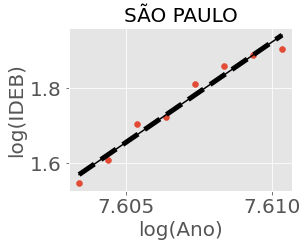

In [473]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('SÃO PAULO')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### SERGIPE

In [474]:
SE = data['SE'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(SE)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-562.19530405   74.09173992]
O coeficiente angular é 74.09173991828837


In [475]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.008207159278979293
R²: 0.9941867986684841


IDEB estimado:  5.712698205050424
R²: 0.9941867986684841
Modelo: b = 74.09173991828837 . t -562.195304053182


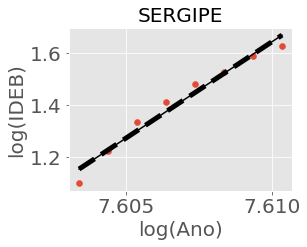

In [476]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('SERGIPE')


previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

### TOCANTINS

In [477]:
TO = data['TO'].values
Ano = data['Ano'].values

t = np.log(Ano)
ones = np.ones(len(t))
b = np.log(TO)

A = np.array([ones, t]).T

AtA = A.T @ A
Atb = A.T @ b

x_hat = np.linalg.solve(AtA, Atb)

print(x_hat)
print('O coeficiente angular é', x_hat[1])

[-478.17526731   63.06564317]
O coeficiente angular é 63.065643170704256


In [478]:
t_linspace = np.linspace(np.min(t), np.max(t), 101)

least_square = x_hat[0] + x_hat[1] * t
least_square_plot = x_hat[0] + x_hat[1] * t_linspace

SEQ = np.sum((least_square - b)**2)
SEQ_m = np.mean(least_square)
R = (SEQ_m -SEQ)/SEQ_m

print('SEQ: ', SEQ)
print('R²:', R)

SEQ:  0.018051100099071345
R²: 0.9884112101313827


IDEB estimado:  6.291955350229018
R²: 0.9884112101313827
Modelo: b = 63.065643170704256 . t -478.17526730503664


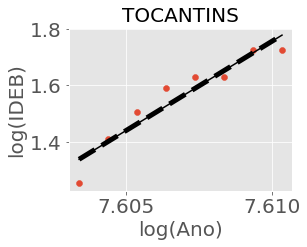

In [479]:
regr = linear_model.LinearRegression()
regr.fit(t.reshape(-1, 1), b)

least_square_sklearn_plot = regr.predict(t_linspace.reshape(-1, 1))
least_square_sklearn = regr.predict(t.reshape(-1, 1))

fig, ax = plt.subplots()
plt.scatter(t, b)
plt.plot(t_linspace, least_square_plot, color='k')
plt.plot(t_linspace, least_square_sklearn_plot, 'k--', linewidth=5)
plt.xlabel('log(Ano)')
plt.ylabel('log(IDEB)')
plt.title('TOCANTINS')

previsao = np.log(2021)

estimado = x_hat[0] + x_hat[1] * previsao

print('IDEB estimado: ', np.exp(estimado))
print('R²:', R)
print('Modelo: b =',x_hat[1],'. t',x_hat[0])

## CONCLUSÃO

In [394]:
indice = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
colunas = ["Estado", "Coef angular", "          R²", " IDEB 2021"]
dados = [["Acre", 80.96, 0.9946,  6.75 ],
["Alagoas", 83.64, 0.9953, 5.98],
["Amapá", 59.60 , 0.9954, 5.25],
["Amazonas", 83.76 , 0.9927 , 6.36],
["Bahia", 88.75, 0.9834, 6.09],
["Ceará", 98.694, 0.9973, 7.57],
["Distrito Federal", 42.15, 0.9974, 6.87],
["Espírito Santo", 51.65, 0.9967, 6.61],
["Goiás", 62.55, 0.9937, 6.93],
["Maranhão", 67.19, 0.9837, 5.51],
["Mato Grosso", 64.89, 0.9844 , 6.73],
["Mato Grosso do Sul", 62.07, 0.9871, 6.47],
["Minas Gerais", 51.24, 0.9910 , 7.22],
["Pará", 79.28, 0.9842 , 5.56],
["Paraíba", 82.31, 0.9920 , 6.11],
["Paraná", 50.29, 0.9976, 7.10],
["Pernambuco", 75.63, 0.9945, 6.14],
["Piauí", 92.01, 0.9841, 6.47],
["Rio de Janeiro", 47.51, 0.9982, 6.26],
["Rio grande do Norte", 86.36, 0.9800, 6.03],
["Rio Grande do Sul", 48.37, 0.9974, 6.47],
["Rondônia", 68.69, 0.9922, 6.47],
["Roraima", 61.39, 0.9980, 6.22],
["Santa Catarina", 56.94, 0.9939, 7.28],
["São Paulo", 52.82, 0.9976, 7.32],
["Sergipe", 74.09, 0.9941, 5.71],
["Tocantins", 63.06, 0.9884, 6.29]]
df = pd.DataFrame(dados,index=indice, columns=colunas)
print('Dataframe com os dados obtidos: Coeficiente Angular, R² e a previsão do IDEB para 2021')
print(df)

Dataframe com os dados obtidos: Coeficiente Angular, R² e a previsão do IDEB para 2021
                 Estado  Coef angular            R²   IDEB 2021
1                  Acre        80.960        0.9946        6.75
2               Alagoas        83.640        0.9953        5.98
3                 Amapá        59.600        0.9954        5.25
4              Amazonas        83.760        0.9927        6.36
5                 Bahia        88.750        0.9834        6.09
6                 Ceará        98.694        0.9973        7.57
7      Distrito Federal        42.150        0.9974        6.87
8        Espírito Santo        51.650        0.9967        6.61
9                 Goiás        62.550        0.9937        6.93
10             Maranhão        67.190        0.9837        5.51
11          Mato Grosso        64.890        0.9844        6.73
12   Mato Grosso do Sul        62.070        0.9871        6.47
13         Minas Gerais        51.240        0.9910        7.22
14               

In [385]:
print('Dataframe odenado por coeficiente angular)
print(df.sort_values(by=['Coef angular'],ascending=False))

                 Estado  Coef angular      R²  IDEB 2021
6                 Ceará        98.694  0.9973       7.57
18                Piauí        92.010  0.9841       6.47
5                 Bahia        88.750  0.9834       6.09
20  Rio grande do Norte        86.360  0.9800       6.03
4              Amazonas        83.760  0.9927       6.36
2               Alagoas        83.640  0.9953       5.98
15              Paraíba        82.310  0.9920       6.11
1                  Acre        80.960  0.9946       6.75
14                 Pará        79.280  0.9842       5.56
17           Pernambuco        75.630  0.9945       6.14
26              Sergipe        74.090  0.9941       5.71
22             Rondônia        68.690  0.9922       6.47
10             Maranhão        67.190  0.9837       5.51
11          Mato Grosso        64.890  0.9844       6.73
27            Tocantins        63.060  0.9884       6.29
9                 Goiás        62.550  0.9937       6.93
12   Mato Grosso do Sul        

In [396]:
print('Dataframe odenado pela estimativa do IDEB para 2021')
print(df.sort_values(by=[' IDEB 2021'],ascending=False))

Dataframe odenado pela estimativa do IDEB para 2021
                 Estado  Coef angular            R²   IDEB 2021
6                 Ceará        98.694        0.9973        7.57
25            São Paulo        52.820        0.9976        7.32
24       Santa Catarina        56.940        0.9939        7.28
13         Minas Gerais        51.240        0.9910        7.22
16               Paraná        50.290        0.9976        7.10
9                 Goiás        62.550        0.9937        6.93
7      Distrito Federal        42.150        0.9974        6.87
1                  Acre        80.960        0.9946        6.75
11          Mato Grosso        64.890        0.9844        6.73
8        Espírito Santo        51.650        0.9967        6.61
22             Rondônia        68.690        0.9922        6.47
12   Mato Grosso do Sul        62.070        0.9871        6.47
21    Rio Grande do Sul        48.370        0.9974        6.47
18                Piauí        92.010        0.9841 

In [395]:
print('Dataframe odenado por R²')
print(df.sort_values(by=['          R²'],ascending=False))

Dataframe odenado por R²
                 Estado  Coef angular            R²   IDEB 2021
19       Rio de Janeiro        47.510        0.9982        6.26
23              Roraima        61.390        0.9980        6.22
16               Paraná        50.290        0.9976        7.10
25            São Paulo        52.820        0.9976        7.32
7      Distrito Federal        42.150        0.9974        6.87
21    Rio Grande do Sul        48.370        0.9974        6.47
6                 Ceará        98.694        0.9973        7.57
8        Espírito Santo        51.650        0.9967        6.61
3                 Amapá        59.600        0.9954        5.25
2               Alagoas        83.640        0.9953        5.98
1                  Acre        80.960        0.9946        6.75
17           Pernambuco        75.630        0.9945        6.14
26              Sergipe        74.090        0.9941        5.71
24       Santa Catarina        56.940        0.9939        7.28
9              

Unindo os resultados obtidos com os conceitos da Álgebra Linear e das outras áreas da matemática, é possível encontrar diversas conclusões muito interessantes. Pelo cálculo do $R^2$, que variou entre $0.9800462084719069$ (correspondente ao Rio Grande do Norte) e $0.9982935474818602$ (correspondente ao Rio de Janeiro), podemos perceber que a regressão linear pelo método dos mínimos quadrados obteve grande confiabilidade, isto é, todos os valores estão bem próximo a $1$. De fato, se olharmos a meta estipulada para o estado do Rio de Janeiro, encontramos o valor de $6.4$, o qual é bem próximo do valor de $6.27$ estimado pelos cálculos do trabalho, principalmente considerando que as notas observadas no estado têm se mantido abaixo da meta desde $2013$. O Distrito Federal e o Rio Grande do Sul apresentaram resultados surpreendentes, com ambas as metas estimadas e projetadas estando por volta de $6.8$ e $6.4$, respectivamente. Já no caso do Rio Grande do Norte, a regressão apontou um valor de $6.4$, enquanto a meta projetada pelo governo é apenas de $5$ pontos. No Ceará, também foi encontrada uma grande diferença, variando acima de $2$ pontos. Isso mostra que, para estipular uma meta para o IDEB, não basta apenas observar sua regressão, mas também o contexto de cada localidade. Em 2021, por exemplo, é possível que uma melhoria na qualidade da educação seja freada pela pandemia da covid-19, a qual interrompeu os estudos presenciais, obrigando as escolas a se ajustarem a um sistema de educação à distância que por muitas vezes pode ser falho, principalmente levando em conta as condições socioeconômicas e o nível de acesso à internet dos alunos. Em relação ao Ceará, que é um estado considerado referência na educação brasileira, pode-se observar que as suas notas do IDEB vêm crescendo muito acima da meta estipulada, revelando um sistema de ensino bem-sucedido e que, como supracitado na introdução, pode ser estudado e expandido em larga escala. É interessante ressaltar também que o maior valor do coeficiente angular foi obtido pelo Ceará, o que evidencia ainda mais o crescimento vertiginoso da sua nota no IDEB ao longo dos anos. Enfim, o trabalho cumpre bem com sua proposta, permitindo não só explorar e aprimorar a compreensão do tema de regressão linear e mínimos quadrados, como também exercitar tópicos de outras áreas, como programação, banco e visualização de dados.